In [1]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold

#---------------------------------------
import tensorflow as tf
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator



#---------------------------------------
import warnings
warnings.filterwarnings("ignore")

2025-05-30 07:54:33.091161: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-30 07:54:33.091277: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-30 07:54:33.220479: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
def train_df(tr_path):
    classes = []
    class_paths = []
    files = os.listdir(tr_path)
    for file in files:
        label_dir = os.path.join(tr_path, file)
        label = os.listdir(label_dir)
        for image in label:
            image_path = os.path.join(label_dir, image)
            class_paths.append(image_path)
            classes.append(file)
    image_classes = pd.Series(classes, name='Class')
    image_paths = pd.Series(class_paths, name='Class Path')
    tr_df = pd.concat([image_paths, image_classes], axis=1)
    return tr_df

In [3]:
def test_df(ts_path):
    classes = []
    class_paths = []
    files = os.listdir(ts_path)
    for file in files:
        label_dir = os.path.join(ts_path, file)
        label = os.listdir(label_dir)
        for image in label:
            image_path = os.path.join(label_dir, image)
            class_paths.append(image_path)
            classes.append(file)
    image_classes = pd.Series(classes, name='Class')
    image_paths = pd.Series(class_paths, name='Class Path')
    ts_df = pd.concat([image_paths, image_classes], axis=1)
    return ts_df

In [4]:
tr_df = train_df('/kaggle/input/coffee-bean-dataset-resized-224-x-224/train')

In [5]:
tr_df

,Class Path,Class
0,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
1,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
2,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
3,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
4,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
...,...,...
1195,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium
1196,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium
1197,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium
1198,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium


In [6]:
ts_df = test_df('/kaggle/input/coffee-bean-dataset-resized-224-x-224/test')

In [7]:
ts_df

,Class Path,Class
0,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
1,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
2,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
3,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
4,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
...,...,...
395,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium
396,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium
397,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium
398,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium


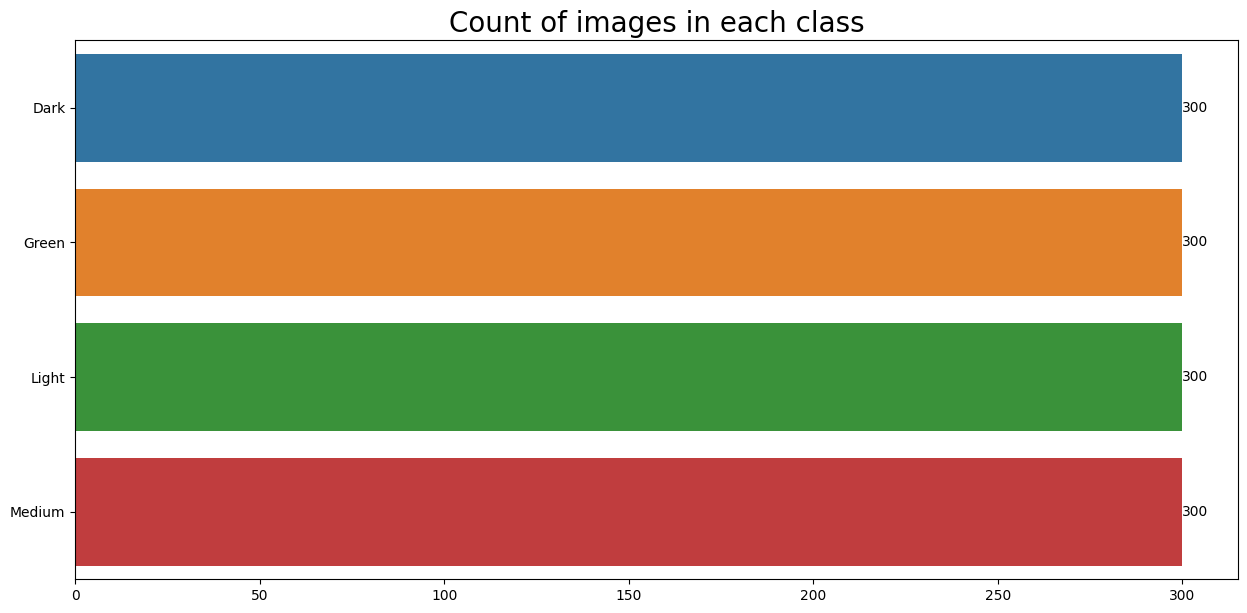

In [8]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

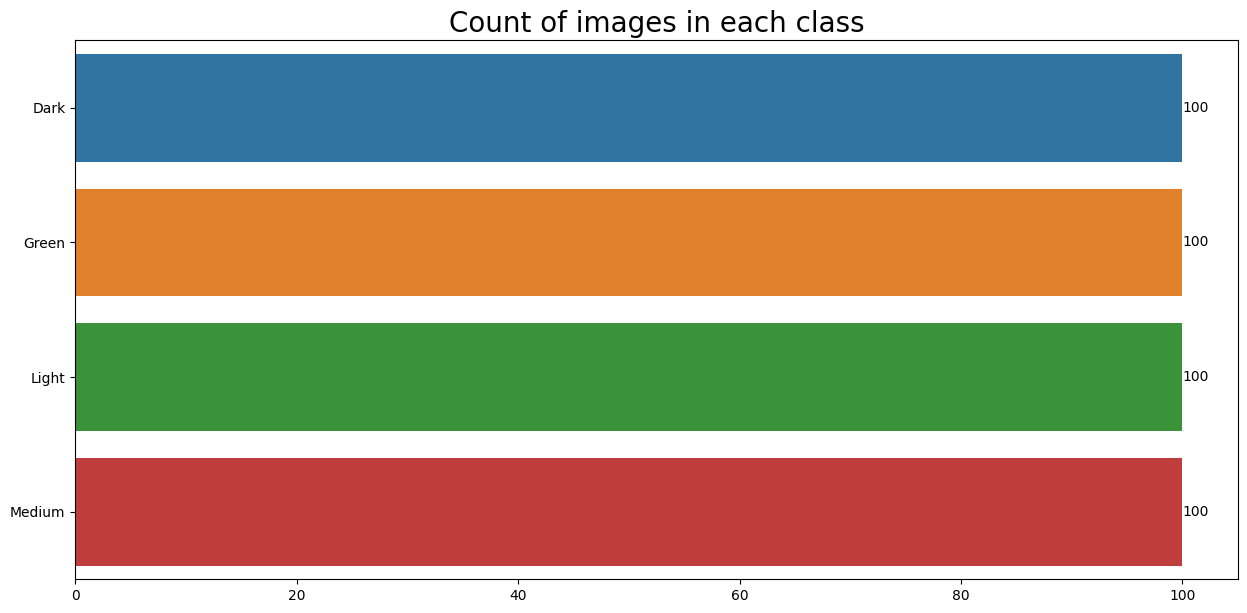

In [9]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df , y=ts_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

In [10]:
valid_df, ts_df = train_test_split(ts_df, train_size=.4, random_state=32)
#valid_df= ts_df

In [11]:
valid_df

,Class Path,Class
263,/kaggle/input/coffee-bean-dataset-resized-224-...,Light
93,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
274,/kaggle/input/coffee-bean-dataset-resized-224-...,Light
16,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
128,/kaggle/input/coffee-bean-dataset-resized-224-...,Green
...,...,...
380,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium
310,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium
389,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium
43,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark


In [12]:
ts_df

,Class Path,Class
223,/kaggle/input/coffee-bean-dataset-resized-224-...,Light
145,/kaggle/input/coffee-bean-dataset-resized-224-...,Green
146,/kaggle/input/coffee-bean-dataset-resized-224-...,Green
366,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium
268,/kaggle/input/coffee-bean-dataset-resized-224-...,Light
...,...,...
224,/kaggle/input/coffee-bean-dataset-resized-224-...,Light
293,/kaggle/input/coffee-bean-dataset-resized-224-...,Light
284,/kaggle/input/coffee-bean-dataset-resized-224-...,Light
213,/kaggle/input/coffee-bean-dataset-resized-224-...,Light


In [13]:
batch_size = 16
img_size = (224,224)
k = 10  # número de folds

# Prepara el dataframe completo (tr_df contiene todo el dataset con las columnas 'Class Path' y 'Class')
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Empieza el proceso k-fold
for fold, (train_idx, val_idx) in enumerate(kf.split(tr_df)):
    print(f"Fold {fold + 1}/{k}")
    
    train_data = tr_df.iloc[train_idx].reset_index(drop=True)
    val_data = tr_df.iloc[val_idx].reset_index(drop=True)
    
    # Generadores con y sin aumento de brillo
    train_gen = ImageDataGenerator(brightness_range=(0.8, 1.2)).flow_from_dataframe(
        dataframe=train_data,
        x_col='Class Path',
        y_col='Class',
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True
    )
    
    val_gen = ImageDataGenerator().flow_from_dataframe(
        dataframe=val_data,
        x_col='Class Path',
        y_col='Class',
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )
    

    #ts_gen = gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                #y_col='Class',batch_size=batch_size,
                                #target_size=img_size,shuffle=False)

    class_dict = train_gen.class_indices
    classes = list(class_dict.keys())
    images, labels = next(train_gen)

    num_classes = len(classes)
    num_classes

    img_shape=(224,224,3)
    base_model = tf.keras.applications.Xception(include_top= False, weights= "imagenet",
                                input_shape= img_shape, pooling= 'max')
        
    model = Sequential([
        base_model,
        Flatten(),
        Dropout(rate=0.3),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(rate=0.25),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(Adamax(learning_rate= 0.001),
                  loss= 'categorical_crossentropy',
                  metrics= ['accuracy'])
    
    #model.summary()

    es = EarlyStopping(monitor='val_loss', mode='min',patience=3)
    hist = model.fit(train_gen,
                     epochs=20,
                     validation_data=val_gen,
                     shuffle= False,
                     callbacks=es)

    loss, acc = model.evaluate(val_gen)
    print(f"Fold {fold+1} - Validation Accuracy: {acc:.4f}")

Fold 1/10
Found 1080 validated image filenames belonging to 4 classes.
Found 120 validated image filenames belonging to 4 classes.
83683744/83683744 [==============================] - 0s 0us/step
Epoch 1/20


I0000 00:00:1748591701.127587      67 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


68/68 [==============================] - 38s 196ms/step - loss: 0.3485 - accuracy: 0.8676 - val_loss: 0.3153 - val_accuracy: 0.8750
Epoch 2/20
68/68 [==============================] - 10s 148ms/step - loss: 0.1215 - accuracy: 0.9574 - val_loss: 0.0674 - val_accuracy: 0.9833
Epoch 3/20
68/68 [==============================] - 10s 148ms/step - loss: 0.0842 - accuracy: 0.9722 - val_loss: 0.0435 - val_accuracy: 0.9833
Epoch 4/20
68/68 [==============================] - 10s 148ms/step - loss: 0.0608 - accuracy: 0.9778 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 5/20
68/68 [==============================] - 10s 148ms/step - loss: 0.0314 - accuracy: 0.9907 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 6/20
68/68 [==============================] - 10s 148ms/step - loss: 0.0290 - accuracy: 0.9907 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 7/20
68/68 [==============================] - 10s 147ms/step - loss: 0.0198 - accuracy: 0.9954 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 8/20